#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [139]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

# NB: To easily load the data, it's advisable you have the data and the notebook file in the same folder

In [1]:
#import your packages here

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline       
# you don't have to call show before our results pops up

mpl.style.use('seaborn') # make our plot look pretty

In [2]:
# Load the sales data here

data=pd.read_csv('sales_data.csv')

In [3]:
data.head(2)

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700


# What is the average sales and profit per market?

In [4]:
data.groupby('Market')['Sales','Profit'].mean()

,Sales,Profit
Market,,
APAC,337.225210,42.596237
Africa,177.023796,20.623734
Canada,180.765566,48.391132
EMEA,156.453122,8.102479
EU,297.415215,38.373754
LATAM,198.738815,20.070383
US,235.842570,31.677105


# Which market brings more sales on the average?

In [5]:
data.groupby('Market')['Sales'].mean()

Market
APAC      337.225210
Africa    177.023796
Canada    180.765566
EMEA      156.453122
EU        297.415215
LATAM     198.738815
US        235.842570
Name: Sales, dtype: float64

# Plot a stacked bar chart showing the sales and profit per market

# i. What are the best 10 performing products with regards to sales in 2013?

In [6]:
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)[:10]

Product Name
Motorola Smart Phone, Full Size                             29357.0982
Cisco Smart Phone, Full Size                                26737.1330
Canon imageCLASS 2200 Advanced Copier                       25899.9260
Harbour Creations Executive Leather Armchair, Adjustable    21871.1296
Apple Smart Phone, Full Size                                21120.4080
Hon Executive Leather Armchair, Adjustable                  20104.6026
Office Star Executive Leather Armchair, Adjustable          19936.1460
Nokia Smart Phone, with Caller ID                           18568.8543
Samsung Smart Phone, VoIP                                   16733.1120
Nokia Smart Phone, Full Size                                14765.8800
Name: Sales, dtype: float64

# ii.What are the least 10 performing products with regards to sales 2013?

In [7]:
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=True)[:10]

Product Name
Newell 310                                     1.408
OIC #2 Pencils, Medium Soft                    1.504
Avery Durable Binders                          1.728
Maxell 4.7GB DVD+R 5/Pack                      1.980
Acco Banker's Clasps, 5 3/4"-Long              2.304
Avery 479                                      2.610
Acco 3-Hole Punch                              2.628
Eldon Spacemaker Box, Quick-Snap Lid, Clear    2.672
Newell 32                                      2.880
Crayola Anti Dust Chalk, 12/Pack               2.912
Name: Sales, dtype: float64

In [8]:
import datetime


# i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

In [9]:
#data['day']= pd.DatetimeIndex(data['Order Date']).day
data['Order Date']= pd.to_datetime(data['Order Date'],format='%Y-%m-%d')

In [10]:
data['day']=data['Order Date'].dt.day

In [11]:
data['month']=data['Order Date'].dt.month

In [12]:
data.head(2)

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,day,month
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,1,1
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,1,1


# i.Show the trend of profit from January to December with a line plot

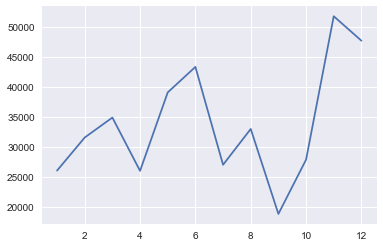

In [13]:
month=range(1,13)
results=data.groupby('month').sum()
plt.plot(month,results['Profit'])
plt.show()

#sns.lineplot(x='month',y='Profit',data=data)

# Which month does the company make more profit and what 5 products are sold most in that month?

In [14]:
data.groupby('month')['Profit'].sum().sort_values(ascending= False) 

#f.groupby('Product Name')['Profit'].sum().sort_values(ascending= False)

month
11    51720.88568
12    47654.27990
6     43298.85000
5     39053.30946
3     34873.71938
8     32977.75576
2     31553.99756
10    27871.97470
7     27019.91294
1     26052.40252
4     26008.05144
9     18850.09084
Name: Profit, dtype: float64

In [15]:
data1=data[data['Order Date'].dt.month==11]
data1.groupby('Product Name')['Sales'].sum().sort_values(ascending= False)


Product Name
Cisco Smart Phone, Full Size                                                     5869.820
SAFCO Executive Leather Armchair, Black                                          5370.300
KitchenAid Stove, Red                                                            4618.215
Tenex Lockers, Wire Frame                                                        4531.806
Cubify CubeX 3D Printer Double Head Print                                        4499.985
                                                                                   ...   
GE General Purpose, Extra Long Life, Showcase & Floodlight Incandescent Bulbs       2.328
Binder Posts                                                                        2.296
Avery 494                                                                           2.088
Harbour Creations File Folder Labels, Adjustable                                    1.989
Avery Hidden Tab Dividers for Binding Systems                                       1.1

# iv. which day does the company make high sales on the average?

In [16]:
data.groupby('day').Sales.mean().sort_values(ascending=False)

day
2     318.411526
1     316.403121
10    308.192499
3     291.859407
16    287.188757
26    283.981118
17    271.615513
6     270.487194
7     264.379302
30    264.281520
28    255.834067
27    254.233484
18    252.714262
31    251.382935
24    248.923563
14    247.979581
19    246.303035
25    244.850794
29    242.991424
15    238.873703
21    236.366999
12    228.981232
22    227.907205
9     223.629552
20    220.862014
8     215.077669
4     213.276352
5     212.703316
23    208.919446
11    208.422190
13    201.898646
Name: Sales, dtype: float64

The company made more sales on the 2nd day with an amount of 318.411526

# i. By analyzing the data, what is the correlation between sales and discount?

In [17]:
#data.corr(method='pearson')
data['Sales'].corr(data['Discount'])

-0.08470981142655344

since the correlation is -0.084710 it means there is a weak relationship between sales and discount as discount increases sales decreases

# . Use a scatter plot to show the relationship between sales and profit.

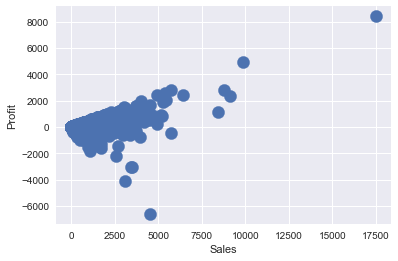

In [18]:
data.plot.scatter(x='Sales',y='Profit', s=150);
plt.show()

# i. Plot a grouped bar chart showing the total profit for the different product category for each market.

Text(0, 0.5, 'Profit')

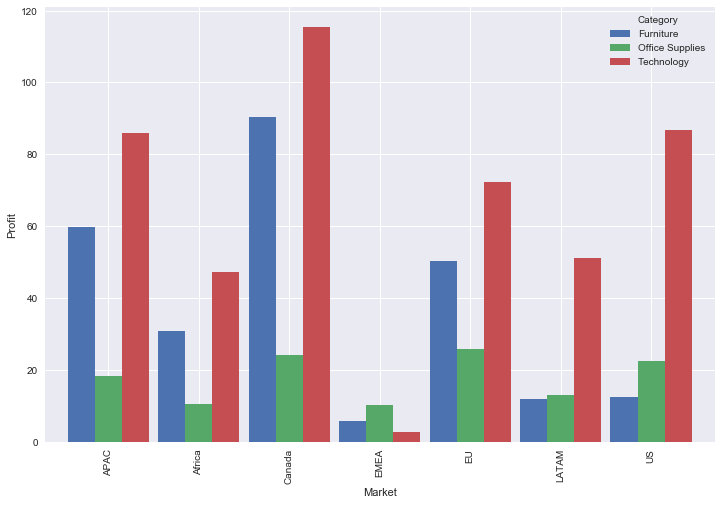

In [19]:

data3=pd.pivot_table(data,values='Profit',
                     index='Market',
                     columns='Category',
                     aggfunc=np.mean)
ax=data3.plot(kind='bar',figsize=(12,8),width=0.9)
ax.set_xlabel('Market')
ax.set_ylabel('Profit')

# From your graph, which product category performs well in each market?

Technology

# i. Which customer spent the most in the whole year?

In [20]:
data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Tamara Chand          23190.40800
Christopher Conant    18232.88840
Laurel Beltran        16622.72232
Joe Elijah            16275.77090
Sanjit Engle          15527.93402
                         ...     
Phillip Breyer          365.69070
Shui Tom                356.33000
Julie Creighton         324.96800
Brendan Dodson          304.49400
David Bremer            201.06000
Name: Sales, Length: 795, dtype: float64

Tamara Chand spent most in the year with the amount of  23190.40800

# What product does the customer in (i) buy the most?

In [21]:
data4=data[data['Customer Name']=='Tamara Chand' ]

data4.groupby('Product Name')['Sales','Customer Name'].max().sort_values(by=['Sales'],ascending=False)

,Sales,Customer Name
Product Name,,
Canon imageCLASS 2200 Advanced Copier,17499.950,Tamara Chand
"SAFCO Executive Leather Armchair, Adjustable",1391.760,Tamara Chand
"Novimex Executive Leather Armchair, Adjustable",1093.248,Tamara Chand
"Nokia Smart Phone, with Caller ID",1022.256,Tamara Chand
Ibico Ibimaster 300 Manual Binding System,735.980,Tamara Chand
"Tenex Lockers, Single Width",245.016,Tamara Chand
"Enermax Keyboard, Programmable",169.920,Tamara Chand
"Sanford Markers, Water Color",158.580,Tamara Chand
"Breville Toaster, Red",153.420,Tamara Chand


The customer buys most of Canon imageCLASS 2200 Advanced Copier

# Which month did the customer spent the most?

In [22]:
data4=data[data['Customer Name']=='Tamara Chand' ]
data4.groupby('month')['Sales','Customer Name'].max().sort_values(by=['Sales'],ascending=False)

,Sales,Customer Name
month,,
3,17499.95,Tamara Chand
11,1391.76,Tamara Chand
9,169.92,Tamara Chand
8,158.58,Tamara Chand
12,153.42,Tamara Chand
2,142.05,Tamara Chand


The 3rd month the customer spent the most

# v. How much did this customer spend in the whole year?

In [23]:
data4=data[data['Customer Name']=='Tamara Chand' ]
data4.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)


Customer Name
Tamara Chand    23190.408
Name: Sales, dtype: float64

The customer spent 23190.40800

# Can you do any other analysis to draw more insight? Feel free to do it.

In [24]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,13799.0,6899.000000,3983.572517,0.000,3449.500,6899.000,10348.500,13798.000
Sales,13799.0,246.811106,494.719419,0.836,30.816,85.232,249.720,17499.950
Quantity,13799.0,3.488369,2.280165,1.000,2.000,3.000,5.000,14.000
Discount,13799.0,0.140265,0.210051,0.000,0.000,0.000,0.200,0.800
Profit,13799.0,29.490197,190.361319,-6599.978,0.000,9.240,36.852,8399.976
day,13799.0,16.055149,8.353731,1.000,9.000,16.000,23.000,31.000
month,13799.0,7.159722,3.325463,1.000,5.000,7.000,10.000,12.000


In [25]:


data.describe(include=object)

,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name
count,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799
unique,6721,1458,795,3,2195,7,13,3,17,3242
top,IN-2013-42311,PK-19075,Pete Kriz,Consumer,New York City,LATAM,Central,Office Supplies,Binders,Staples
freq,13,37,47,7091,257,3060,3055,8391,1670,49
